<a href="https://colab.research.google.com/github/srumangala/Python/blob/main/avocado_price_analysis_withinference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avocado Prices
Historical data on avocado prices and sales volume in multiple US markets

source : https://www.kaggle.com/datasets/neuromusic/avocado-prices



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import io
plt.style.use('ggplot')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))

## Analysing Data

In [4]:
df.shape

(18249, 14)

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
df.describe() # describes numerical values

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
df = df.drop(['Unnamed: 0'], axis=1) # drops columns

In [15]:
df.shape

(18249, 13)

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
pd.to_datetime(df['Date']) # important to convert some object Dtypes to more suitable Data Type

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [18]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Renaming Columns to make them look better

In [19]:
df = df.rename(columns={'4046':'PLU 4046','4225':'PLU 4225', '4770':'PLU 4770', 'type':'Type', 'region': 'Region',
                   'Total Volume':'Total_Volume','Total Bags':'Total_Bags',
                  'Small Bags':'Small_Bags', 'Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags',
                  'AveragePrice': 'Average_Price'})

In [20]:
df.isna().sum() # no null values

Date             0
Average_Price    0
Total_Volume     0
PLU 4046         0
PLU 4225         0
PLU 4770         0
Total_Bags       0
Small_Bags       0
Large_Bags       0
XLarge_Bags      0
Type             0
year             0
Region           0
dtype: int64

In [87]:
len(df.query('Total_Bags <100'))

117

In [21]:
df.loc[df.duplicated()] # no duplicate rows in the data (Gives location of duplicated data)

,Date,Average_Price,Total_Volume,PLU 4046,PLU 4225,PLU 4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,year,Region


In [22]:
df.loc[df.duplicated(subset=['Average_Price','year','Region','Type'])] # second time they occur

,Date,Average_Price,Total_Volume,PLU 4046,PLU 4225,PLU 4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,year,Region
11,2015-10-11,1.28,64489.17,1582.03,52677.92,105.32,10123.90,9866.27,257.63,0.00,conventional,2015,Albany
13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.00,conventional,2015,Albany
14,2015-09-20,1.33,69759.01,1028.03,59313.12,150.50,9267.36,8489.10,778.26,0.00,conventional,2015,Albany
15,2015-09-13,1.28,76111.27,985.73,65696.86,142.00,9286.68,8665.19,621.49,0.00,conventional,2015,Albany
17,2015-08-30,1.07,105693.84,689.01,94362.67,335.43,10306.73,10218.93,87.80,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18218,2018-02-18,1.52,1814929.97,246515.35,680037.45,1905.46,886241.96,783017.98,103184.01,39.97,organic,2018,TotalUS
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.00,organic,2018,WestTexNewMexico
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.00,organic,2018,WestTexNewMexico
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.00,organic,2018,WestTexNewMexico


In [23]:
df.query('Average_Price == 1.28')

,Date,Average_Price,Total_Volume,PLU 4046,PLU 4225,PLU 4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,year,Region
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
11,2015-10-11,1.28,64489.17,1582.03,52677.92,105.32,10123.90,9866.27,257.63,0.0,conventional,2015,Albany
15,2015-09-13,1.28,76111.27,985.73,65696.86,142.00,9286.68,8665.19,621.49,0.0,conventional,2015,Albany
116,2015-10-04,1.28,657444.04,35342.34,407609.95,42257.73,172234.02,167494.61,4739.41,0.0,conventional,2015,BaltimoreWashington
140,2015-04-19,1.28,762862.62,67486.78,427623.27,42125.28,225627.29,219885.88,5741.41,0.0,conventional,2015,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17281,2017-01-22,1.28,3750.22,99.78,928.56,0.00,2721.88,63.35,2658.53,0.0,organic,2017,Spokane
17343,2017-11-26,1.28,3420.98,54.32,44.03,0.00,3322.63,3072.61,250.02,0.0,organic,2017,Syracuse
17600,2017-01-01,1.28,15307.87,867.66,3434.02,37.30,10968.89,10815.88,153.01,0.0,organic,2017,WestTexNewMexico
17829,2018-03-25,1.28,9506.07,319.39,1427.13,0.00,7685.05,3437.74,4247.31,0.0,organic,2018,Indianapolis


## Visualising Parameters Individually

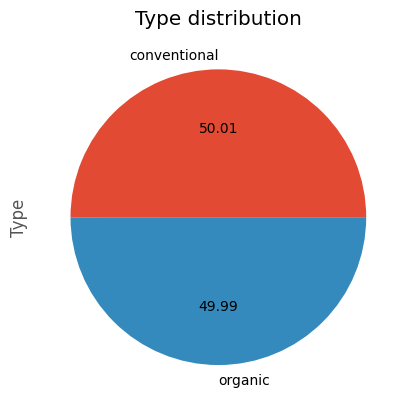

In [26]:
ax = df['Type'].value_counts()\
.plot(kind='pie', title = 'Type distribution', autopct='%1.2f')
plt.show()

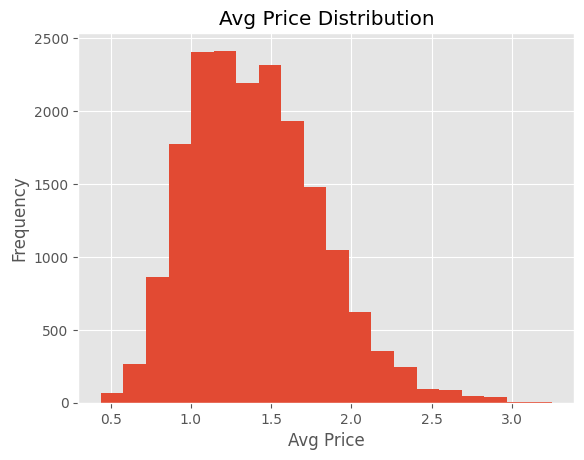

In [28]:
ax = df['Average_Price'].plot(kind='hist', bins =20, title ='Avg Price Distribution - Histogram')
ax.set_xlabel('Avg Price')
plt.show()

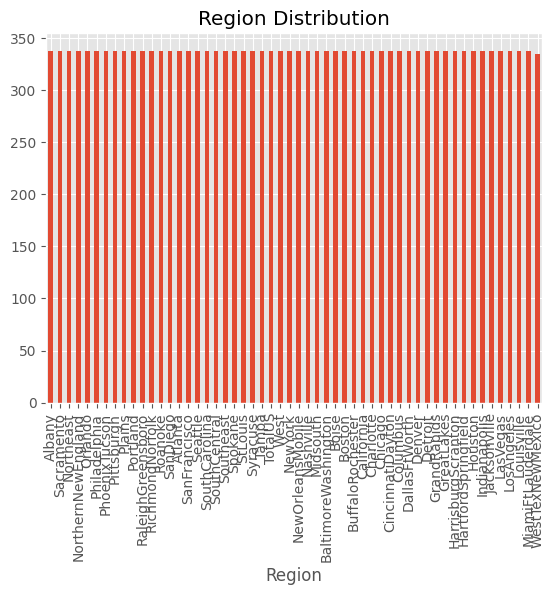

In [34]:
ax = df['Region'].value_counts().plot(kind='bar', title ='Region Distribution')
ax.set_xlabel('Region')
plt.show()

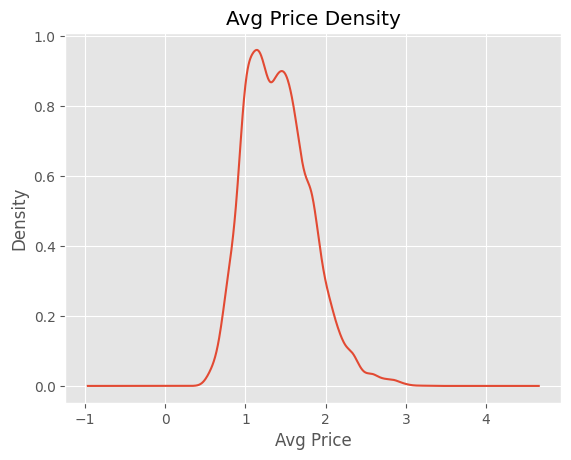

In [102]:
ax = df['Average_Price'].plot(kind='kde',  title ='Avg Price Density') # kernel density plot
ax.set_xlabel('Avg Price')
plt.show()

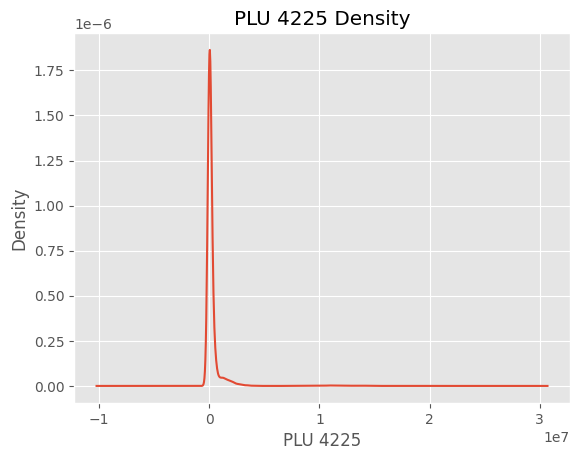

In [52]:
ax = df['PLU 4225'].plot(kind='kde',  title ='PLU 4225 Density') # kernel density plot
ax.set_xlabel('PLU 4225')
plt.show()

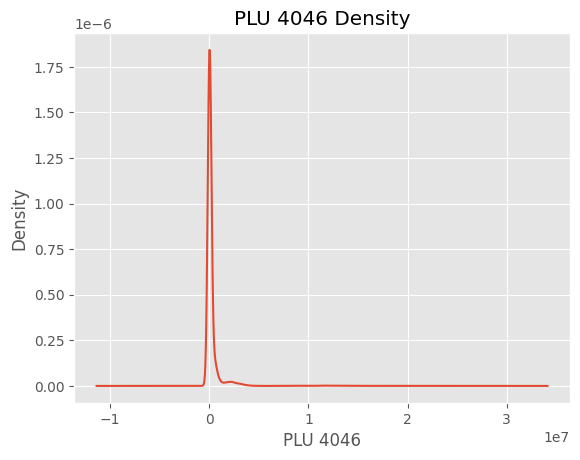

In [51]:
ax = df['PLU 4046'].plot(kind='kde',  title ='PLU 4046 Density') # kernel density plot
ax.set_xlabel('PLU 4046')
plt.show()

<Axes: >

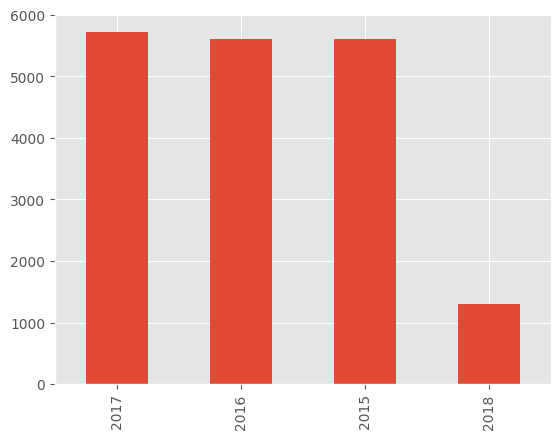

In [53]:
df['year'].value_counts().plot(kind='bar')

## Data Relationships

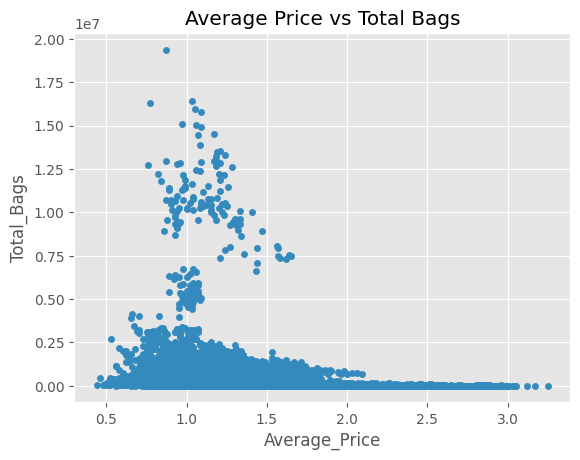

In [54]:
df.plot(kind='scatter', x='Average_Price', y='Total_Bags', title='Average Price vs Total Bags')
plt.show()

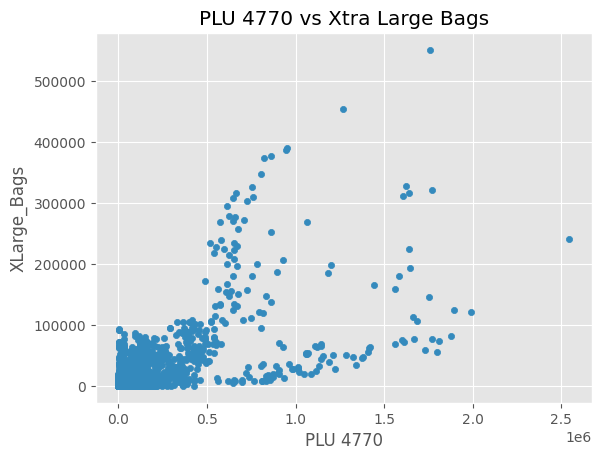

In [57]:
df.plot(kind='scatter', x='PLU 4770', y='XLarge_Bags', title='PLU 4770 vs Xtra Large Bags')
plt.show()

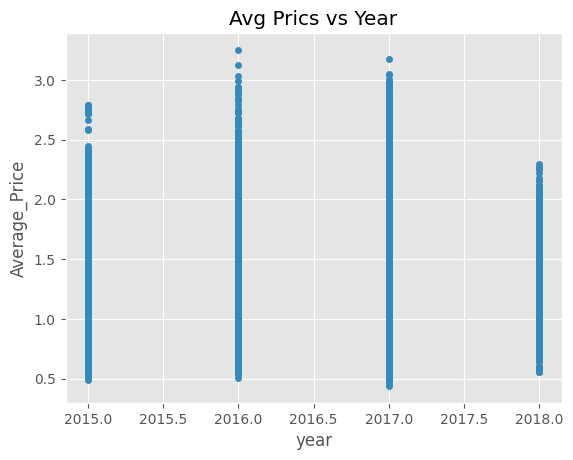

In [65]:
df.plot(kind='scatter', x='year', y='Average_Price', title='Avg Prics vs Year')
plt.show()

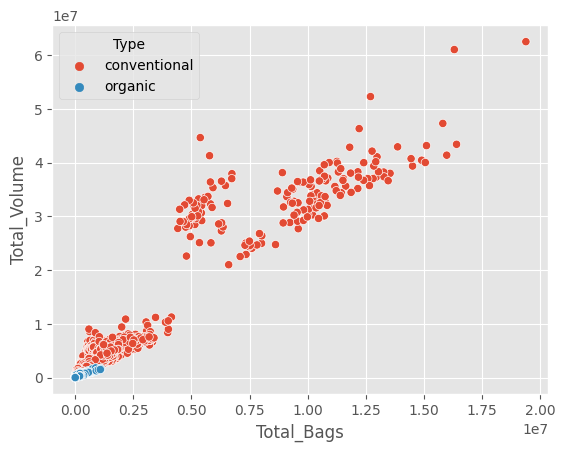

In [75]:
sns.scatterplot(x='Total_Bags', y='Total_Volume', data=df, hue='Type')
plt.show()

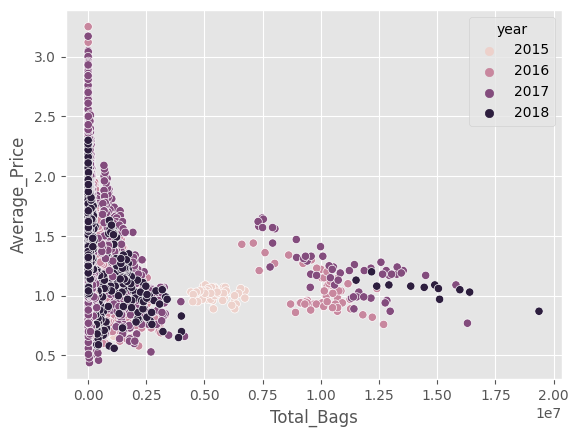

In [88]:
sns.scatterplot(x='Total_Bags', y='Average_Price', data=df, hue='year')
plt.show()

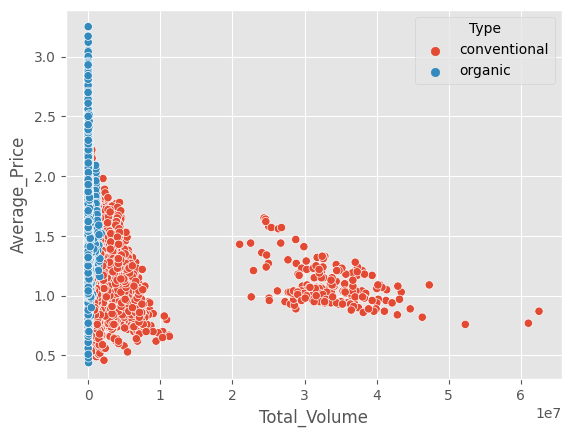

In [94]:
sns.scatterplot(x='Total_Volume', y='Average_Price', data=df, hue='Type')
plt.show()

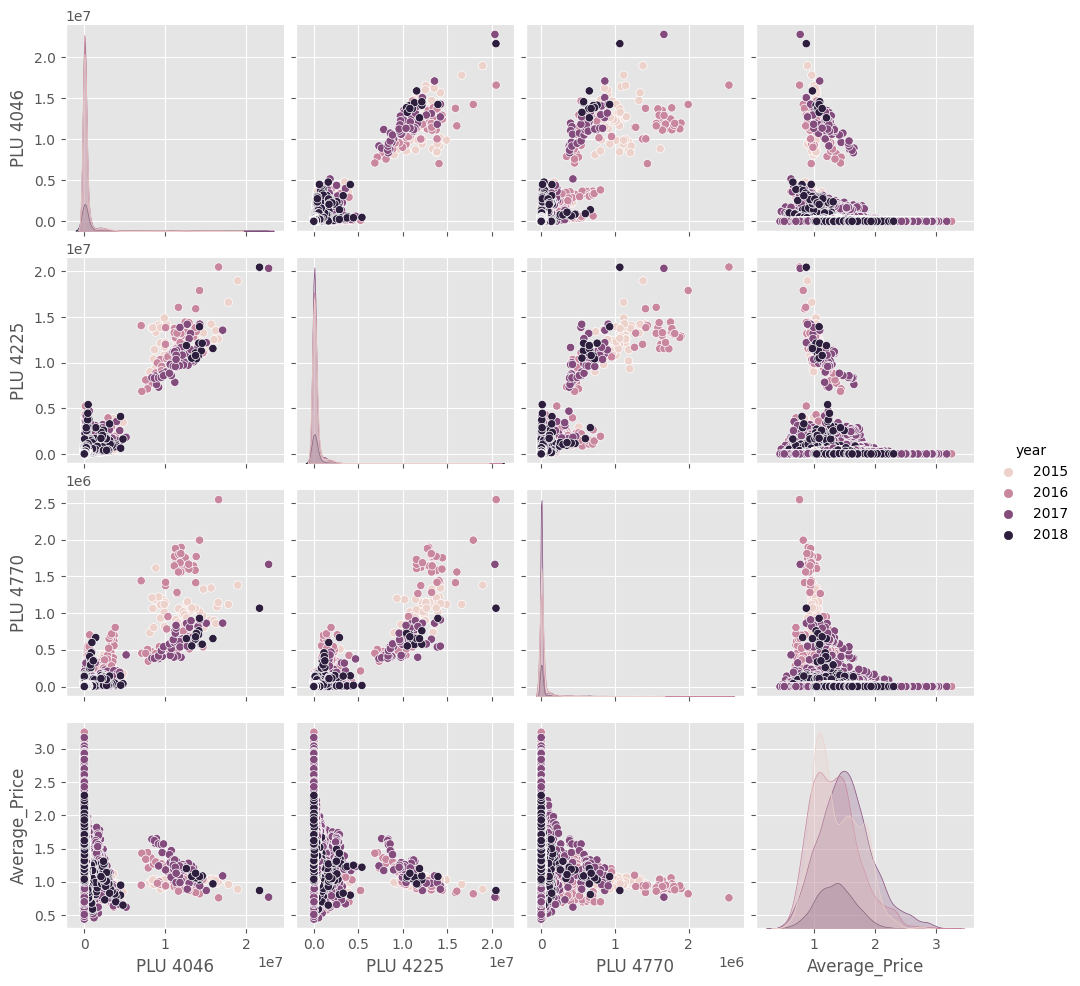

In [77]:
sns.pairplot(data=df, vars=['PLU 4046','PLU 4225', 'PLU 4770', 'Average_Price'],hue='year')
plt.show()

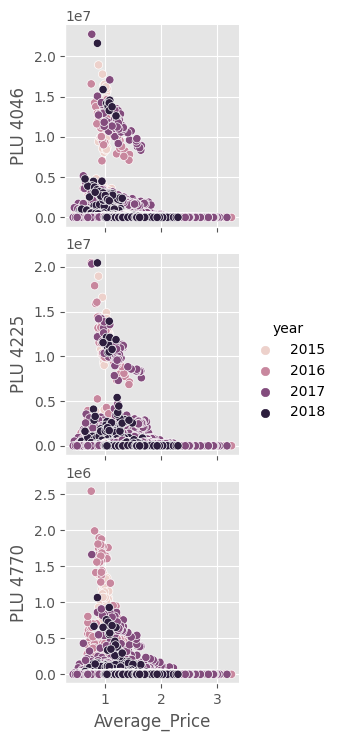

In [92]:
sns.pairplot(data=df, y_vars=['PLU 4046','PLU 4225', 'PLU 4770'],x_vars =['Average_Price'],hue='year')
plt.show()

In [95]:
df_corr=df[['year','Average_Price','Total_Volume', 'Total_Bags']].dropna().corr()

In [90]:
df_corr1=df[['Date', 'Average_Price', 'Total_Volume', 'PLU 4046', 'PLU 4225',
       'PLU 4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'Type', 'year', 'Region']].dropna().corr()

<ipython-input-90-0abfb34f6c50>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Type', 'year', 'Region']].dropna().corr()


<Axes: >

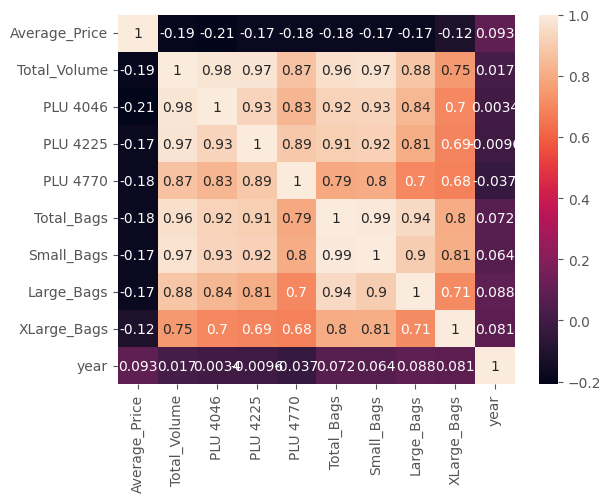

In [91]:
sns.heatmap(df_corr1, annot=True)

<Axes: >

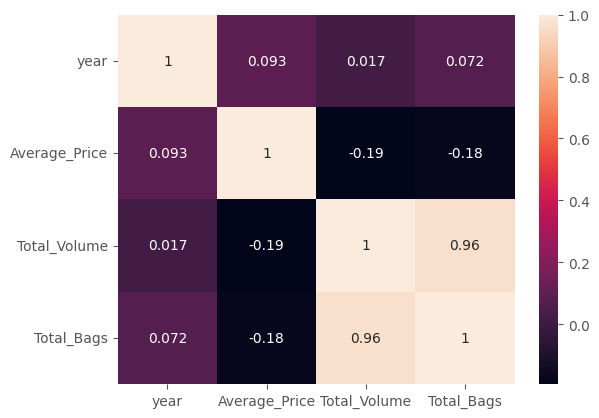

In [97]:
sns.heatmap(df_corr, annot=True)

In [98]:
df_corr=df[['year','Average_Price','PLU 4046', 'Total_Bags']].dropna().corr()

<Axes: >

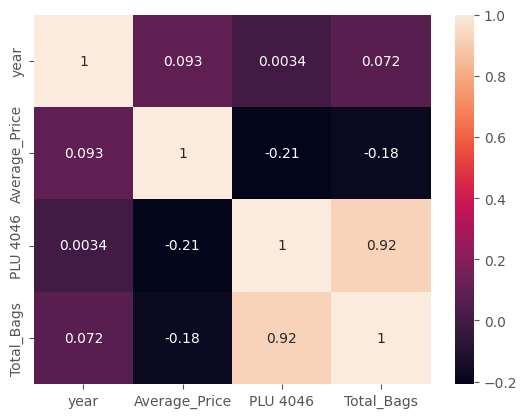

In [99]:
sns.heatmap(df_corr, annot=True)

In [89]:
df.columns

Index(['Date', 'Average_Price', 'Total_Volume', 'PLU 4046', 'PLU 4225',
       'PLU 4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'Type', 'year', 'Region'],
      dtype='object')

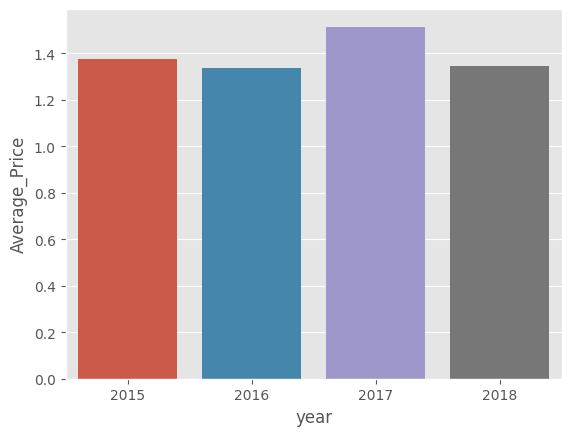

In [108]:
avg_price_df = pd.DataFrame(df.groupby('year')['Average_Price'].mean())
sns.barplot(avg_price_df , x = avg_price_df.index , y = 'Average_Price')
plt.show()

<Axes: xlabel='year', ylabel='Total_Volume'>

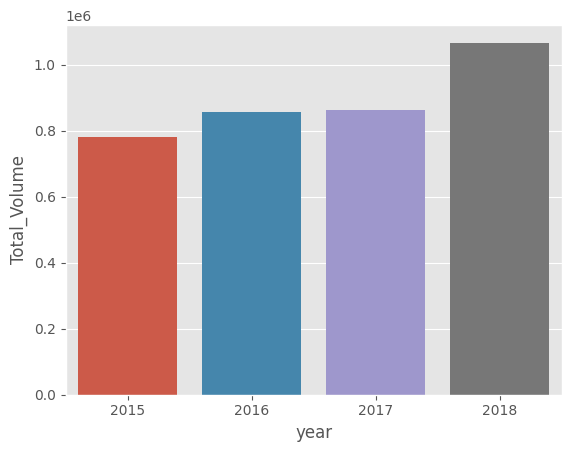

In [109]:
tot_vol_df = pd.DataFrame(df.groupby('year')['Total_Volume'].mean())
sns.barplot(tot_vol_df , x = tot_vol_df.index , y = 'Total_Volume')

<Axes: xlabel='Average_Price', ylabel='Total_Volume'>

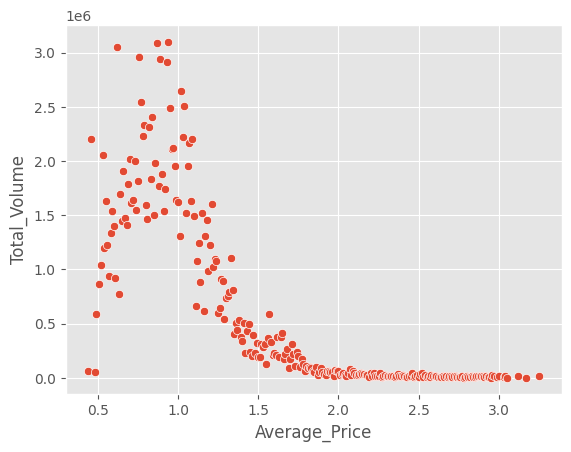

In [116]:
tot_avgvol_df = pd.DataFrame(df.groupby('Average_Price')['Total_Volume'].mean())
sns.scatterplot(tot_avgvol_df , x = tot_avgvol_df.index , y = 'Total_Volume')